In [1]:
import os
import pyart
from matplotlib import pyplot as plt
import matplotlib.ticker as mticker
import numpy as np
import xarray as xr
from datetime import datetime, timedelta

from metpy import plots, calc
from metpy.units import units
import profile_io as io

import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER


## You are using the Python ARM Radar Toolkit (Py-ART), an open source
## library for working with weather radar data. Py-ART is partly
## supported by the U.S. Department of Energy as part of the Atmospheric
## Radiation Measurement (ARM) Climate Research Facility, an Office of
## Science user facility.
##
## If you use this software to prepare a publication, please cite:
##
##     JJ Helmus and SM Collis, JORS 2016, doi: 10.5334/jors.119



In [2]:
radar_vols_path = '/g/data/kl02/jss548/hail-research/hailsonde/20230724_CASCV_subset'
radars, radar_dt_list = io.load_nhp_radar_data(radar_vols_path, 360)

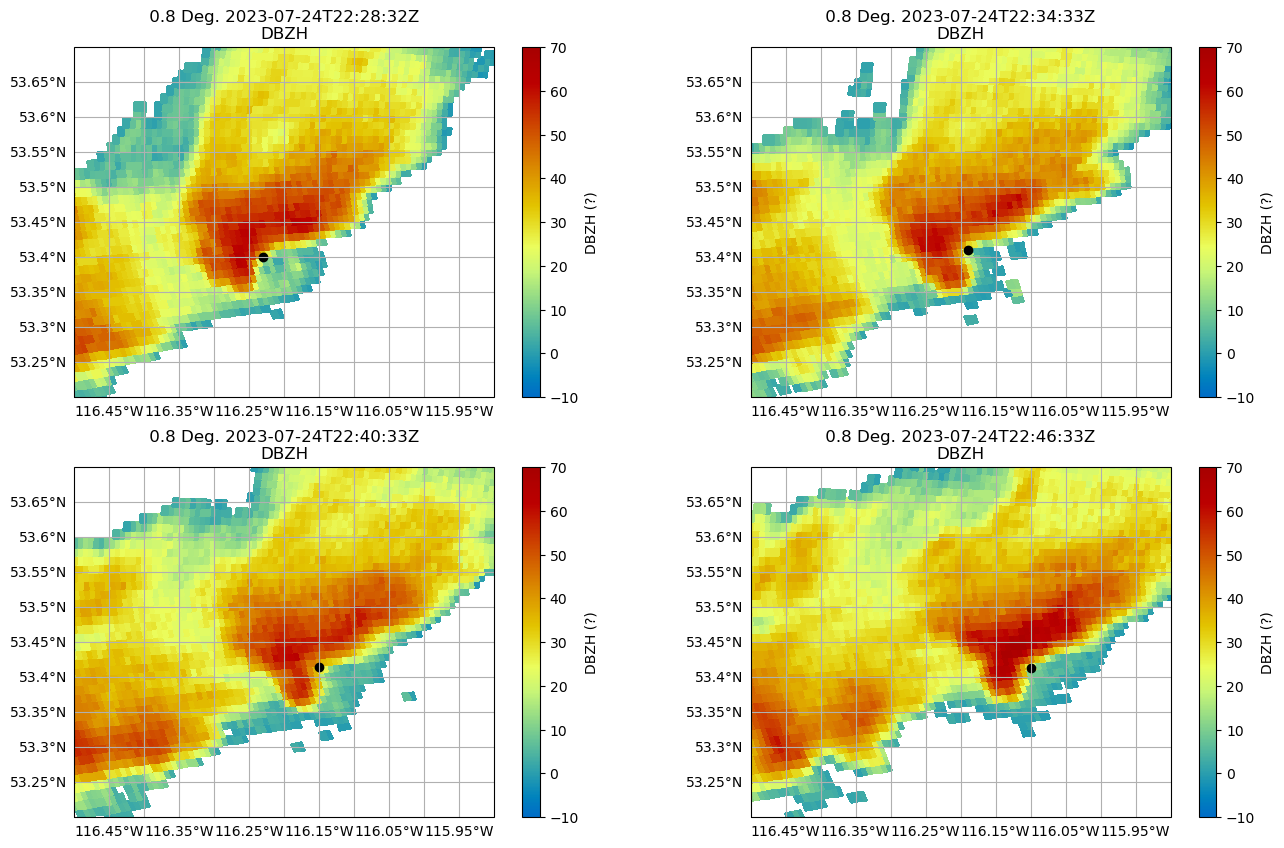

In [3]:
fig = plt.figure(figsize=(16, 10))
min_lon=-116.5
max_lon=-115.9
min_lat=53.2
max_lat=53.7
sweep = 15

storm1_lat = 53.4
storm1_lon = -116.23
storm2_lat = 53.41
storm2_lon = -116.19
storm3_lat = 53.415
storm3_lon = -116.15
storm4_lat = 53.4125
storm4_lon = -116.1

#plot at t=0
display = pyart.graph.RadarMapDisplay(radars[1])
ax = fig.add_subplot(221, projection=ccrs.PlateCarree())
display.plot_ppi_map('DBZH', 
                        sweep=sweep, ax=ax, vmin=-10, vmax=70,
                        lon_lines=np.arange(-117, -115, 0.05),
                        lat_lines=np.arange(53, 54, 0.05),
                        min_lon=min_lon,
                        max_lon=max_lon,
                        min_lat=min_lat,
                        max_lat=max_lat)
display.plot_point(storm1_lon, storm1_lat, symbol='ko')

#plot at t=6min
display = pyart.graph.RadarMapDisplay(radars[2])
ax = fig.add_subplot(222, projection=ccrs.PlateCarree())
display.plot_ppi_map('DBZH', 
                        sweep=sweep, ax=ax, vmin=-10, vmax=70,
                        lon_lines=np.arange(-117, -115, 0.05),
                        lat_lines=np.arange(53, 54, 0.05),
                        min_lon=min_lon,
                        max_lon=max_lon,
                        min_lat=min_lat,
                        max_lat=max_lat)
display.plot_point(storm2_lon, storm2_lat, symbol='ko')

#plot at t=12min
display = pyart.graph.RadarMapDisplay(radars[3])
ax = fig.add_subplot(223, projection=ccrs.PlateCarree())
display.plot_ppi_map('DBZH', 
                        sweep=sweep, ax=ax, vmin=-10, vmax=70,
                        lon_lines=np.arange(-117, -115, 0.05),
                        lat_lines=np.arange(53, 54, 0.05),
                        min_lon=min_lon,
                        max_lon=max_lon,
                        min_lat=min_lat,
                        max_lat=max_lat)
display.plot_point(storm3_lon, storm3_lat, symbol='ko')

#plot at t=18min
display = pyart.graph.RadarMapDisplay(radars[4])
ax = fig.add_subplot(224, projection=ccrs.PlateCarree())
display.plot_ppi_map('DBZH', 
                        sweep=sweep, ax=ax, vmin=-10, vmax=70,
                        lon_lines=np.arange(-117, -115, 0.05),
                        lat_lines=np.arange(53, 54, 0.05),
                        min_lon=min_lon,
                        max_lon=max_lon,
                        min_lat=min_lat,
                        max_lat=max_lat)
display.plot_point(storm4_lon, storm4_lat, symbol='ko')

In [13]:
import pyproj
geodesic = pyproj.Geod(ellps='WGS84')
t1_t2_bearing,back_azimuth,t1_t2_dist = geodesic.inv(storm1_lon, storm1_lat, storm2_lon, storm2_lat)
t2_t3_bearing,back_azimuth,t2_t3_dist = geodesic.inv(storm2_lon, storm2_lat, storm3_lon, storm3_lat)
t3_t4_bearing,back_azimuth,t3_t4_dist = geodesic.inv(storm3_lon, storm3_lat, storm4_lon, storm4_lat)

print('t1 t2', t1_t2_bearing, t1_t2_dist/360) #in units of degTN and m
print('t2 t3', t2_t3_bearing, t2_t3_dist/360) #in units of degTN and m
print('t3 t4', t3_t4_bearing, t3_t4_dist/360) #in units of degTN and m

mean_bearing = np.mean([t1_t2_bearing, t2_t3_bearing, t3_t4_bearing])
mean_speed = np.mean([t1_t2_dist, t2_t3_dist, t3_t4_dist])/360 #6 min volumes

mean_bearing_rad = (270-mean_bearing)*0.0174533 #convert compass degrees to radians
mean_uwnd = mean_speed*np.cos(mean_bearing_rad)
mean_vwnd = mean_speed*np.sin(mean_bearing_rad)

print('mean u, mean v',mean_uwnd, mean_vwnd) #invert these number when applying to vx and vy fields from Alain


t1 t2 67.28184419694864 8.01030696442935
t2 t3 78.16735007486177 7.5483643229691655
t3 t4 94.7637314812022 9.267513284692418
mean u, mean v -8.151444829587566 -1.4269222948257532
